The ultimate goal in studying networks is to better understand the behavior of the systems they represent. For instance, we study social networks to better understand the nature of social interactions and their implications for human experience, commerce, the spread of disease, and the structure of society. We study the Internet to better understand the flow of data traffic or why communications protocols function the way they do or how we might change the network to make it perform better. We study biochemical networks like metabolic networks because we hope it will lead to a better understanding of the complex chemical processes taking place in the cell and perhaps even to new therapies for disease or injury.

In [1]:
import networkx as nx
import networkx.algorithms.community as nxcom
import community
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']=200

In [2]:
plt.rcParams.update({'figure.figsize': (15, 10)})
#get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [3]:
G_karate=nx.karate_club_graph()
#Find communities
communities=sorted(nxcom.greedy_modularity_communities(G_karate),key=len,reverse=True)
#Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


The output of the community detection consists of sets of vertex numbers (set of sets). If we wish to visualize this we need to define a few utilities. The methods simply assign the community number to the nodes and edges:

In [12]:
def set_node_community(G,communities):
    """Add community to node attributes"""
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 o save 0 for external edges
            G.nodes[v]['community']=c+1

def set_edge_community(G):
    """Find internal edges and add their community to their attributes"""
    for v, w in G.edges:
        if G.nodes[v]['community']==G.nodes[w]['community']:
            # internal edge, mark with community
            G.edges[v,w]['community']=G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v,w]['community']=0

def get_color(i,r_off=1,g_off=1,b_off=1):
    """Assign a color to a vertex"""
    r0,g0,b0=0,0,0
    n=16
    low,high=0.1,0.9
    span=high-low
    r=low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r,g,b)

In [17]:
set_node_community(G_karate,communities)
set_edge_community(G_karate)

In [18]:
node_color=[get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
#Set community color for edges between members of the same community (internal) and intra-community edges (external)

external=[(v,w) for v,w in G_karate.edges if G_karate.edges[v,w]['community']==0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

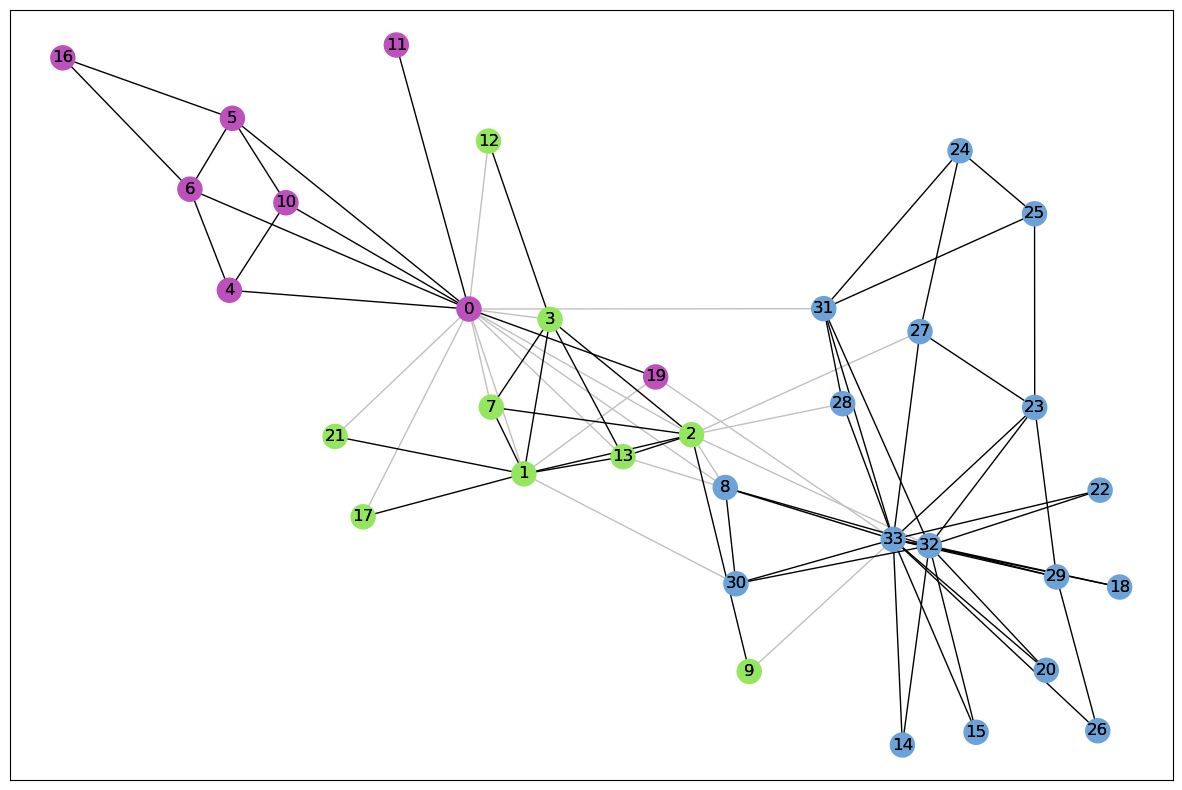

In [27]:
karate_pos = nx.spring_layout(G_karate)

# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

In [13]:
G_social=nx.read_edgelist('facebook_combined.txt')

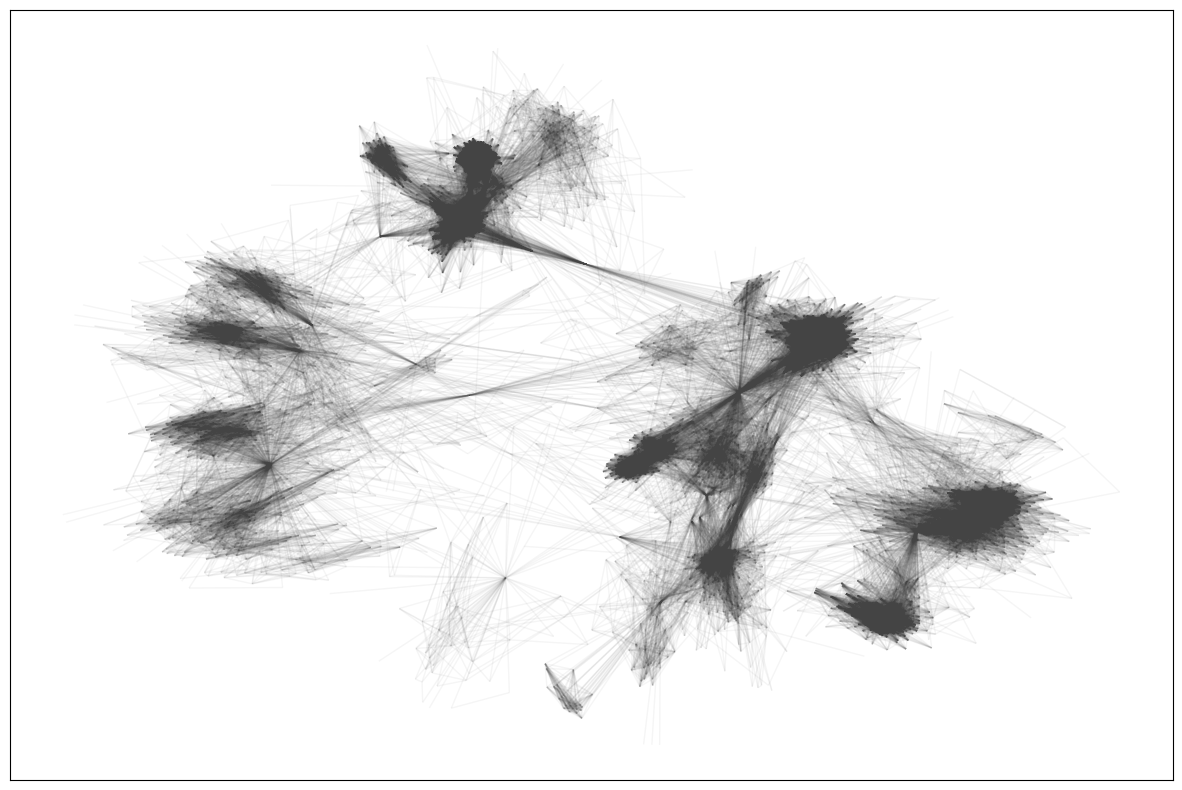

In [29]:
pos=nx.spring_layout(G_social,k=0.1)
nx.draw_networkx(G_social,pos=pos,node_size=0,edge_color='#444444',alpha=.05,with_labels=False)

In [30]:
communities=sorted(nxcom.greedy_modularity_communities(G_social),key=len,reverse=True)
len(communities)

13

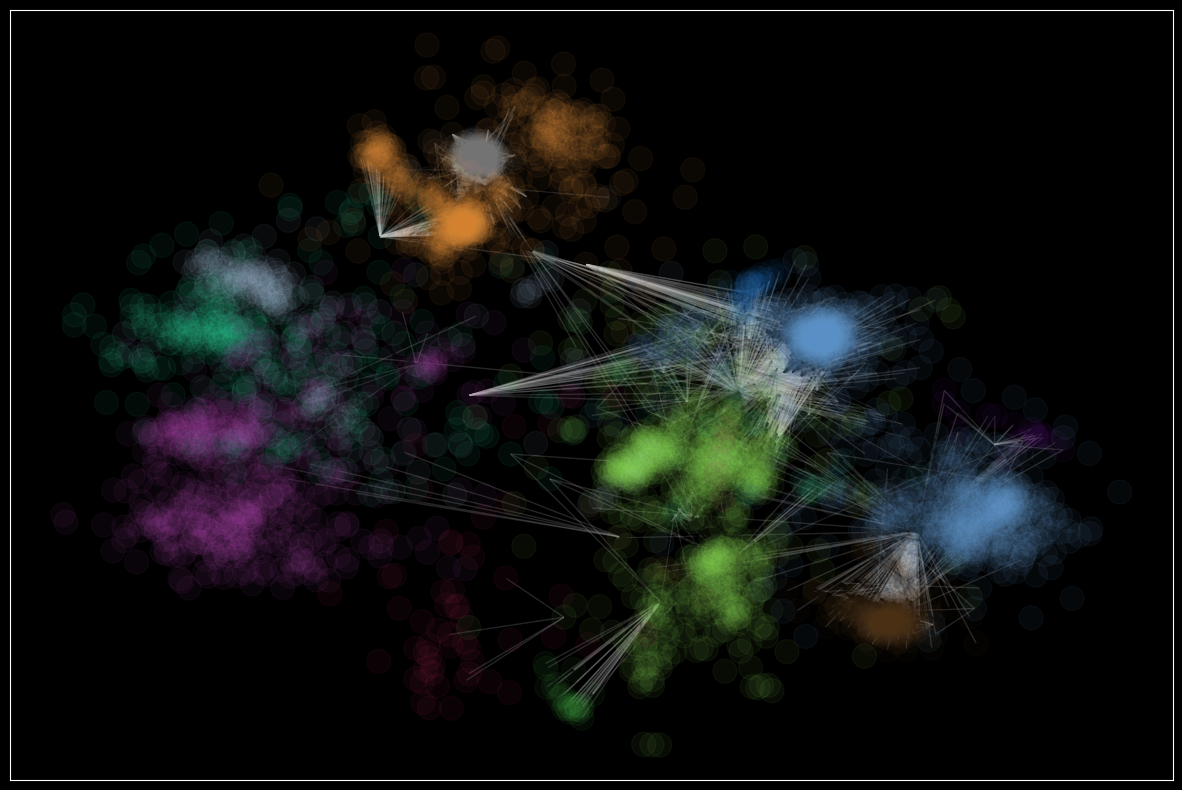

In [31]:
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G_social,communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]

# external edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)

# internal edges
nx.draw_networkx(
    G_social, pos=pos, 

    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

In [17]:
from sklearn.metrics import pairwise_distances,mutual_info_score
import pandas as pd
from statsmodels.stats.dist_dependence_measures import distance_correlation
from statsmodels.tsa.stattools import ccf
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer


from shapely.geometry import linestring
import geopandas as gpd

af=pd.read_csv('../../datasetsV2/af_year_country.csv')
af=af.rename(columns={'Unnamed: 0':'country.value','Unnamed: 1':'date'})

af_ex_pr=pd.DataFrame({'country':af['country.value'],'date':af.date,'mean_af':af.iloc[:,4]})
af_ex_pr_piv=mean_af.pivot(index='country',columns='date',values='mean_af')
af_ex_pr_piv=mean_af_piv.dropna(thresh=5)
# mean_af_piv=mean_af_piv.interpolate(limit_direction='both')

# other_af_color = pd.DataFrame({'country':af['country.value'],'date':af.date,'mean_af':af.iloc[:,2:4].mean(axis=1)})
# # other_af_color = other_af_color.interpolate(limit_direction='both')
# other_af_color = other_af_color.groupby('country').mean()

In [19]:
af_ex_pr_piv

date,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.001575,-0.090273,0.003610,0.363547,-0.082830,-0.008248,0.146265,-0.091028,-0.027647,-0.061507,...,-0.641088,0.231928,-0.001924,0.236759,0.037856,0.056582,NaN,NaN,NaN,0.112720
Albania,0.119531,0.307824,-0.242325,0.529549,0.118314,-0.206917,-0.052080,0.242499,-0.007523,0.193475,...,0.429037,0.585074,0.016365,0.245484,0.120930,-0.044773,-0.023434,0.023371,-0.128749,0.000000
Algeria,-0.244743,-0.448076,NaN,NaN,-0.202625,NaN,NaN,NaN,NaN,-0.314725,...,-0.996569,NaN,-0.237347,0.127117,NaN,NaN,NaN,NaN,NaN,0.018114
American Samoa,NaN,NaN,NaN,NaN,-0.361251,NaN,0.000000,NaN,NaN,NaN,...,0.000000,NaN,NaN,-0.088225,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,-0.017958,NaN,NaN,-0.269684,NaN,-0.026810,NaN,...,0.918367,0.939945,0.000000,0.376960,0.127686,NaN,NaN,NaN,-0.009242,-0.528012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Samoa,NaN,NaN,NaN,-0.773708,0.000000,NaN,0.000000,NaN,NaN,0.314725,...,0.000000,0.039164,NaN,-0.036761,NaN,NaN,NaN,NaN,NaN,0.000000
Yemen,-0.179648,-0.448076,NaN,NaN,0.107899,NaN,-0.194849,0.069975,-0.032342,0.053393,...,0.056220,-0.776814,-0.200078,0.120878,0.271776,NaN,NaN,NaN,-0.019894,0.192162
Yugoslav SFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.068667,-0.098562,NaN,NaN


In [16]:
mean_af_piv

date,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.056459,-0.184147,-0.062120,0.003964,-0.068899,-0.057457,0.052009,-0.059060,0.119516,-0.026074,...,-0.047335,-0.146673,-0.087688,0.115422,-0.102387,0.068529,-0.217008,0.025059,0.019365,0.032884
Albania,-0.056459,-0.184147,-0.062120,0.003964,-0.068899,-0.057457,0.052009,-0.059060,0.119516,-0.026074,...,-0.047335,-0.146673,-0.087688,0.115422,-0.102387,0.068529,-0.217008,0.025059,0.019365,0.032884
Algeria,-0.145634,0.061001,-0.062120,0.003964,-0.029862,-0.057457,0.052009,-0.059060,0.119516,-0.009077,...,-0.071550,-0.006575,-0.030738,0.014456,-0.102387,0.068529,-0.217008,0.025059,0.019365,0.003702
American Samoa,-0.142027,0.059273,-0.057087,0.012348,-0.022244,-0.045767,0.045982,-0.047944,0.100768,0.005297,...,-0.090739,-0.003651,-0.029140,0.018364,-0.092981,0.052043,-0.146274,0.030074,0.020174,0.006959
Andorra,-0.138420,0.057545,-0.052053,0.020732,-0.014626,-0.034076,0.039956,-0.036829,0.082021,0.019671,...,-0.109928,-0.000727,-0.027542,0.022272,-0.083575,0.035557,-0.075540,0.035089,0.020984,0.010216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Samoa,0.093491,0.028707,0.057556,-0.009693,0.054501,0.016675,-0.056288,-0.009113,0.046588,0.108939,...,-0.157427,0.045569,0.001896,-0.061832,0.056194,0.022279,-0.126057,-0.063009,0.006404,-0.011532
Yemen,0.095482,0.031044,0.053703,-0.017136,0.062951,0.011896,-0.065345,-0.012959,0.038306,0.122972,...,-0.190664,-0.024882,0.000477,-0.079724,0.056194,0.026521,-0.126057,-0.083625,0.002597,-0.014861
Yugoslav SFR,0.097474,0.033381,0.049851,-0.024580,0.010498,0.007116,-0.021065,-0.016806,0.030023,0.072492,...,-0.096419,-0.095334,-0.000942,0.022018,0.056194,0.030762,-0.126057,-0.104242,-0.001209,-0.000512


In [6]:
# other_af_color['classes'] = pd.cut(other_af_color['mean_af'].values.flatten(),
#                                    [-1,-.05,.05,1],labels=['fragile','robust','antifragile'])

# other_af_color['classes'] = pd.cut(other_af_color['mean_af'].values.flatten(),
#                                    [-1,-.1,-.02,.02,.1,1],labels=['fragile','fragile-robust','robust','antifragile-robust','antifragile'])


kbins=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans').fit(other_af_color['mean_af'].values.reshape(-1,1))
other_af_color['classes'] = pd.cut(other_af_color['mean_af'].values.flatten(),
                                   kbins.bin_edges_[0],labels=['fragile','fragile-robust','robust','antifragile-robust','antifragile'])


In [406]:
from scipy.stats import entropy
def MI(x,y):
    """Mutual information in base e"""
    c_xy=np.histogram2d(x,y,bins=10)[0] # discretizamos
    return mutual_info_score(None,None,contingency=c_xy)

def distance_MI(x,y):
    c_x=np.histogram(x,10)[0] # discretizamos
    c_y=np.histogram(y,10)[0]
    factor=min(entropy(c_x),entropy(c_y))
    return 1 - MI(x,y)/factor

In [407]:
def max_xcorr(x,y):
    
    backwards = ccf(x[::-1], y[::-1], unbiased=False)[::-1]
    forwards = ccf(x, y, unbiased=False)
    ccf_output = np.r_[backwards[:-1], forwards]

    maximum = abs(ccf_output).max()
    index=np.where(abs(ccf_output)==maximum)
    return ccf_output[index]

In [408]:
def explore():
    plt.rcParams.update({'figure.figsize': (15, 10)})
    # Set node and edge communities
    set_node_community(G,communities)
    set_edge_community(G)

    # Set community color for internal edges
    external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
    internal_color = ["black" for e in internal]
    node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

    pos=nx.spring_layout(G,k=0.3)

    # external edges
    # Draw external edges
    nx.draw_networkx(
        G,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")
    # Draw nodes and internal edges
    nx.draw_networkx(
        G,
        pos=pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color)
    
    
    world=gpd.read_file('../../../world_shapefiles/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
    world=world[world.CNTRY_NAME !='Antarctica']

    world_meters=world.to_crs(epsg=32663)

    lines=[]
    for country1,country2 in G.edges:
        try:
            centroid1=world_meters[world_meters['CNTRY_NAME']==country1].centroid.values[0]
            centroid2=world_meters[world_meters['CNTRY_NAME']==country2].centroid.values[0]
            lines.append( linestring.LineString([centroid1,centroid2]))
        except IndexError as e:
            pass


    centroids=[]
    c_nodes=[]
    for country in G.nodes:
        try:
            c=world_meters[world_meters['CNTRY_NAME']==country].centroid.values[0]
            centroids.append(c)
            c_nodes.append(country)
        except IndexError as e:
            print(country)

    lines=gpd.GeoSeries(lines)

    node_color = [get_color(G.nodes[v]['community']) for v in G.nodes if v in c_nodes]

    centroids=gpd.GeoDataFrame(centroids,columns=['Cent'])
    centroids['colour']=node_color
    centroids=centroids.set_geometry('Cent')

    fig,ax=plt.subplots(figsize=(25,30)) 
    missing_kwds={"color": "lightgrey","edgecolor": "black","hatch": "///","label": "Missing values"}
    
    world_af=pd.merge_ordered(world.to_crs(epsg=32663),other_af_color,left_on='CNTRY_NAME',right_on=other_af_color.index,how='outer')
    world_af=world_af.set_geometry('geometry')
    world_af.plot(column='classes',missing_kwds=missing_kwds,ax=ax,legend=True)
    
    world_meters.plot(color='lightgrey',
                      edgecolor='grey',
                      alpha=.5,
                      ax=ax)

    lines.plot(alpha=.2,ax=ax,color='black')
    centroids.plot(color=centroids.colour,markersize=50,ax=ax,marker='o')
    
    plt.show()

In [409]:
prox_matrix=pairwise_distances(mean_af_piv.values,metric=max_xcorr,force_all_finite='allow-nan')

/home/emmanuel/miniconda3/envs/networksenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  after removing the cwd from sys.path.


In [410]:
prox_df=pd.DataFrame(data=prox_matrix,index=mean_af_piv.index.values,columns=mean_af_piv.index.values)
treshold=.95
connected_countries=prox_df[prox_df>treshold].fillna(0)
np.fill_diagonal(connected_countries.values,0)

In [411]:
import networkx as nx
import networkx.algorithms.community as nxcom
G = nx.Graph()
for country1,series in connected_countries.iteritems():
    for country2,proximity in series.iteritems():
        if not np.equal(proximity,0):  
            G.add_edge(country1,country2,length=proximity)

In [412]:
result = nxcom.girvan_newman(G)
communities = next(result)
len(communities)

20

Ethiopia PDR
Sudan (former)


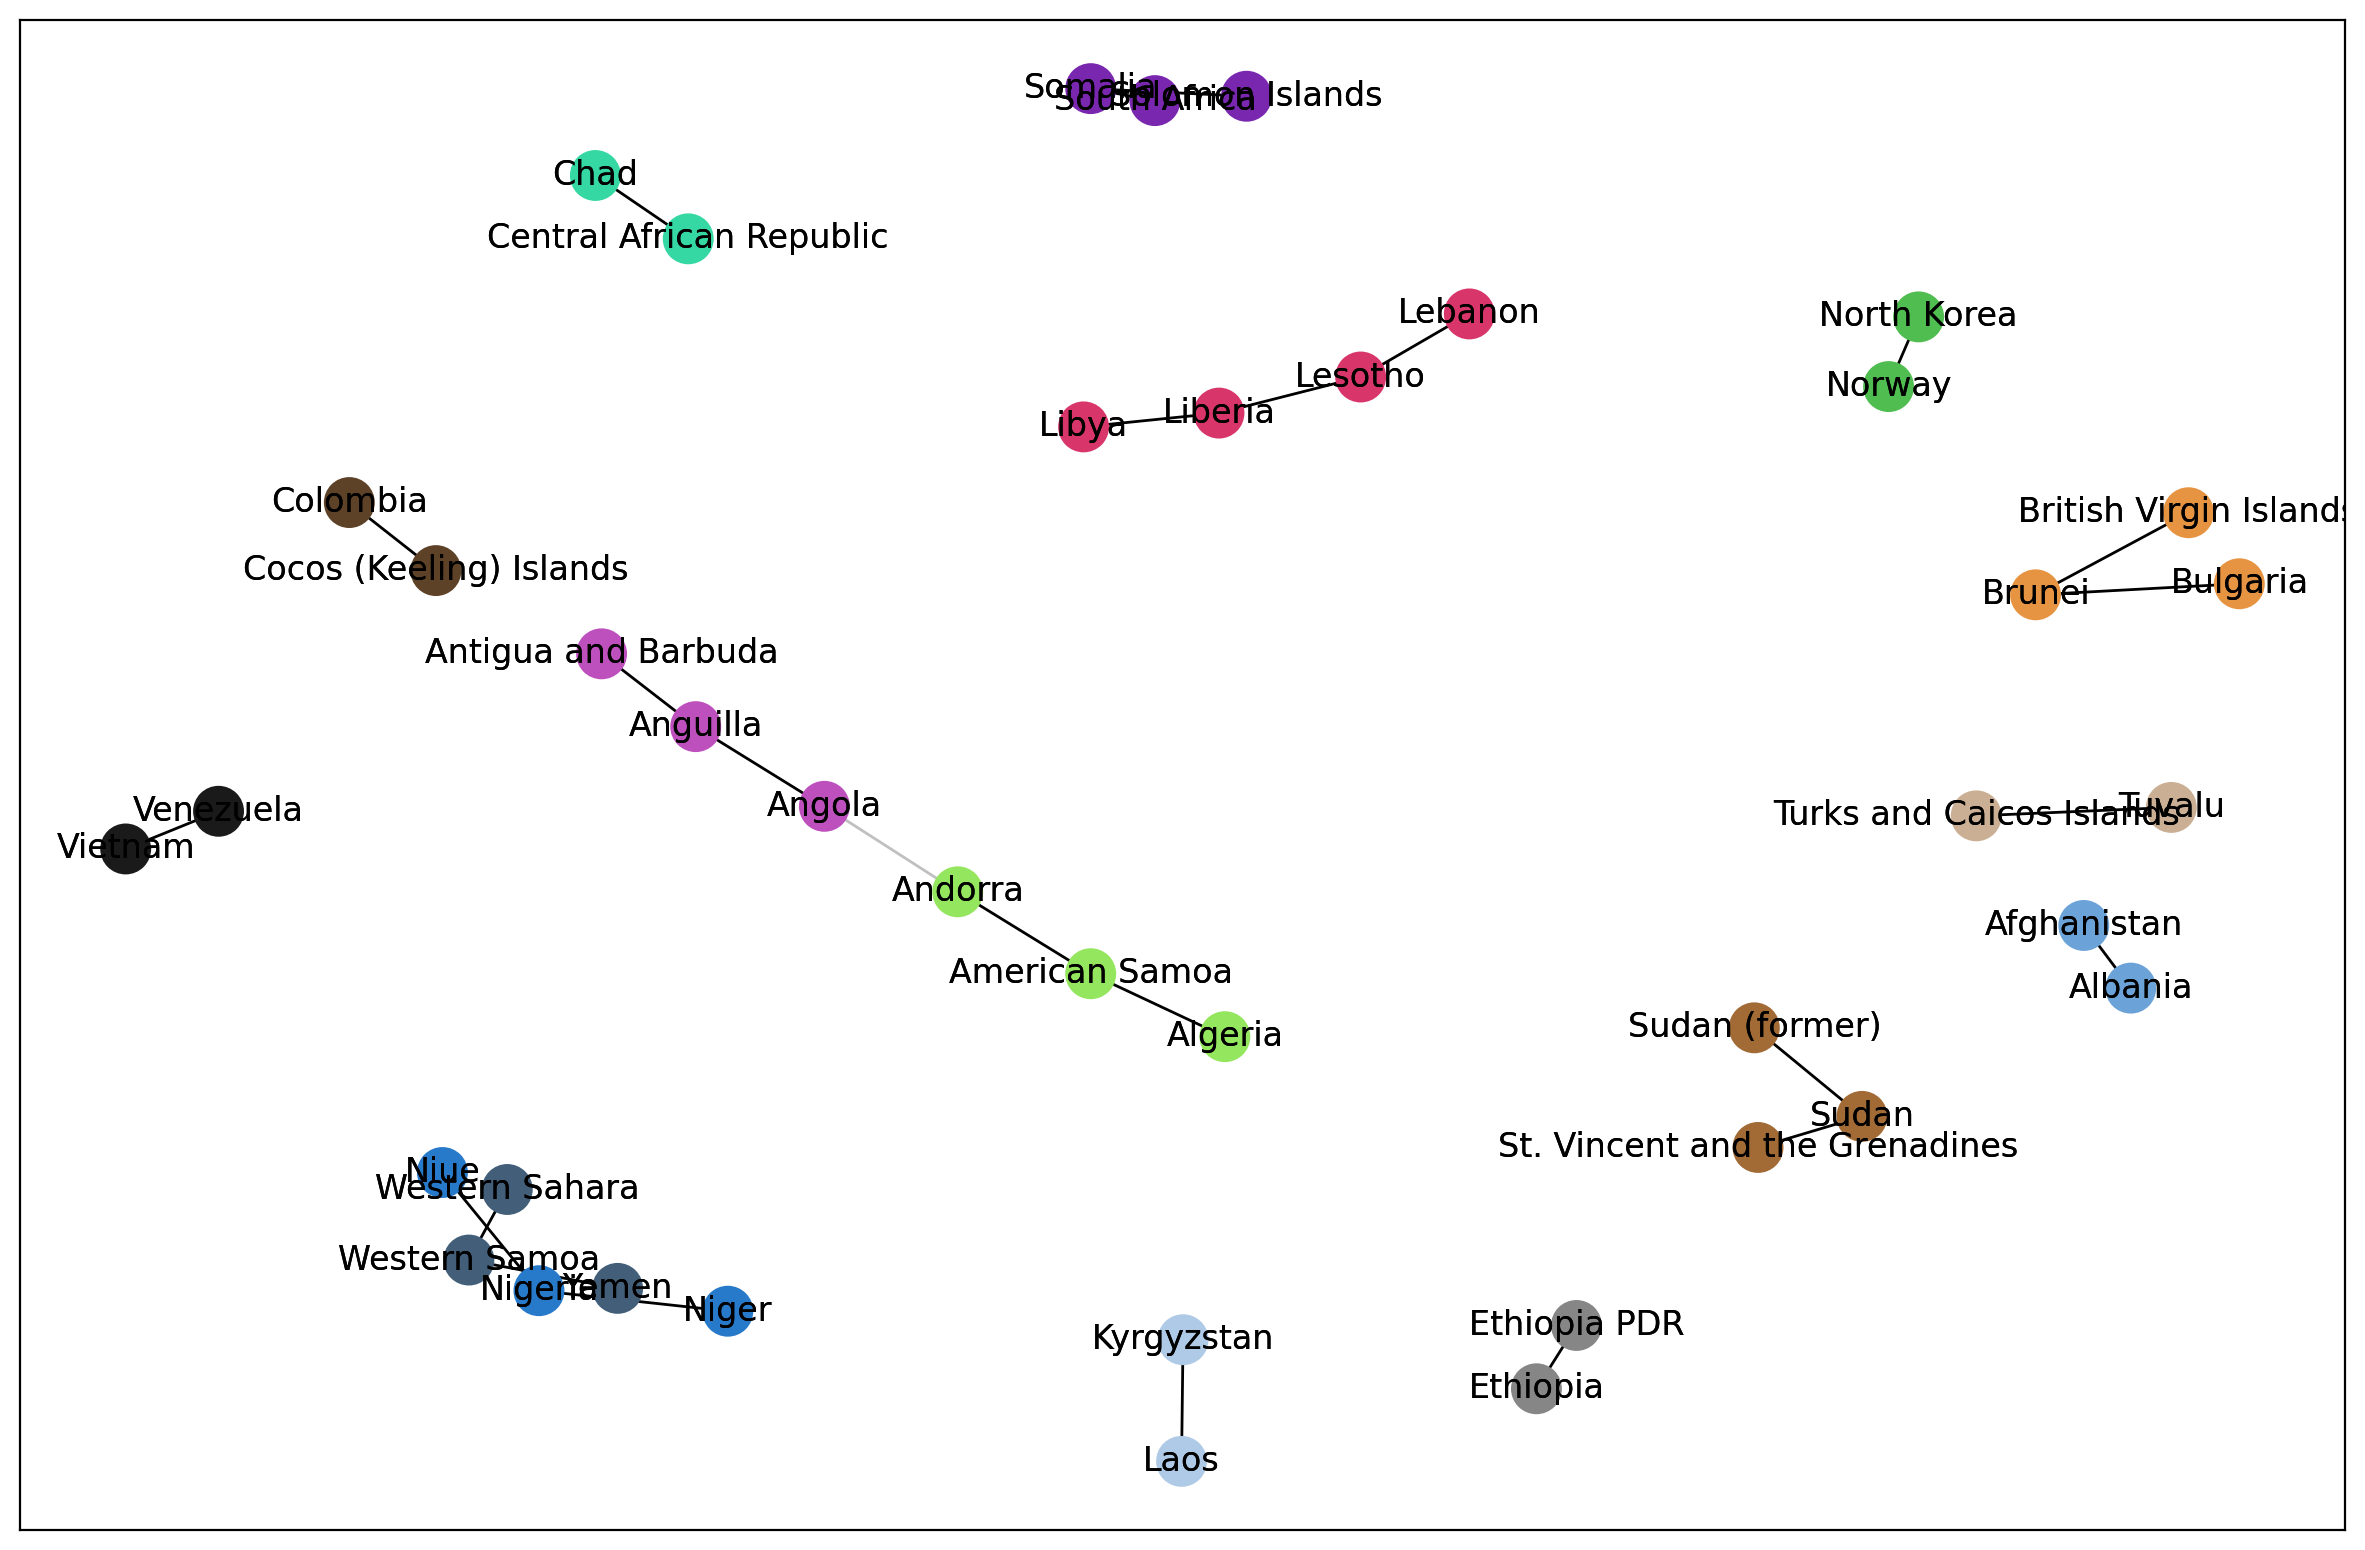

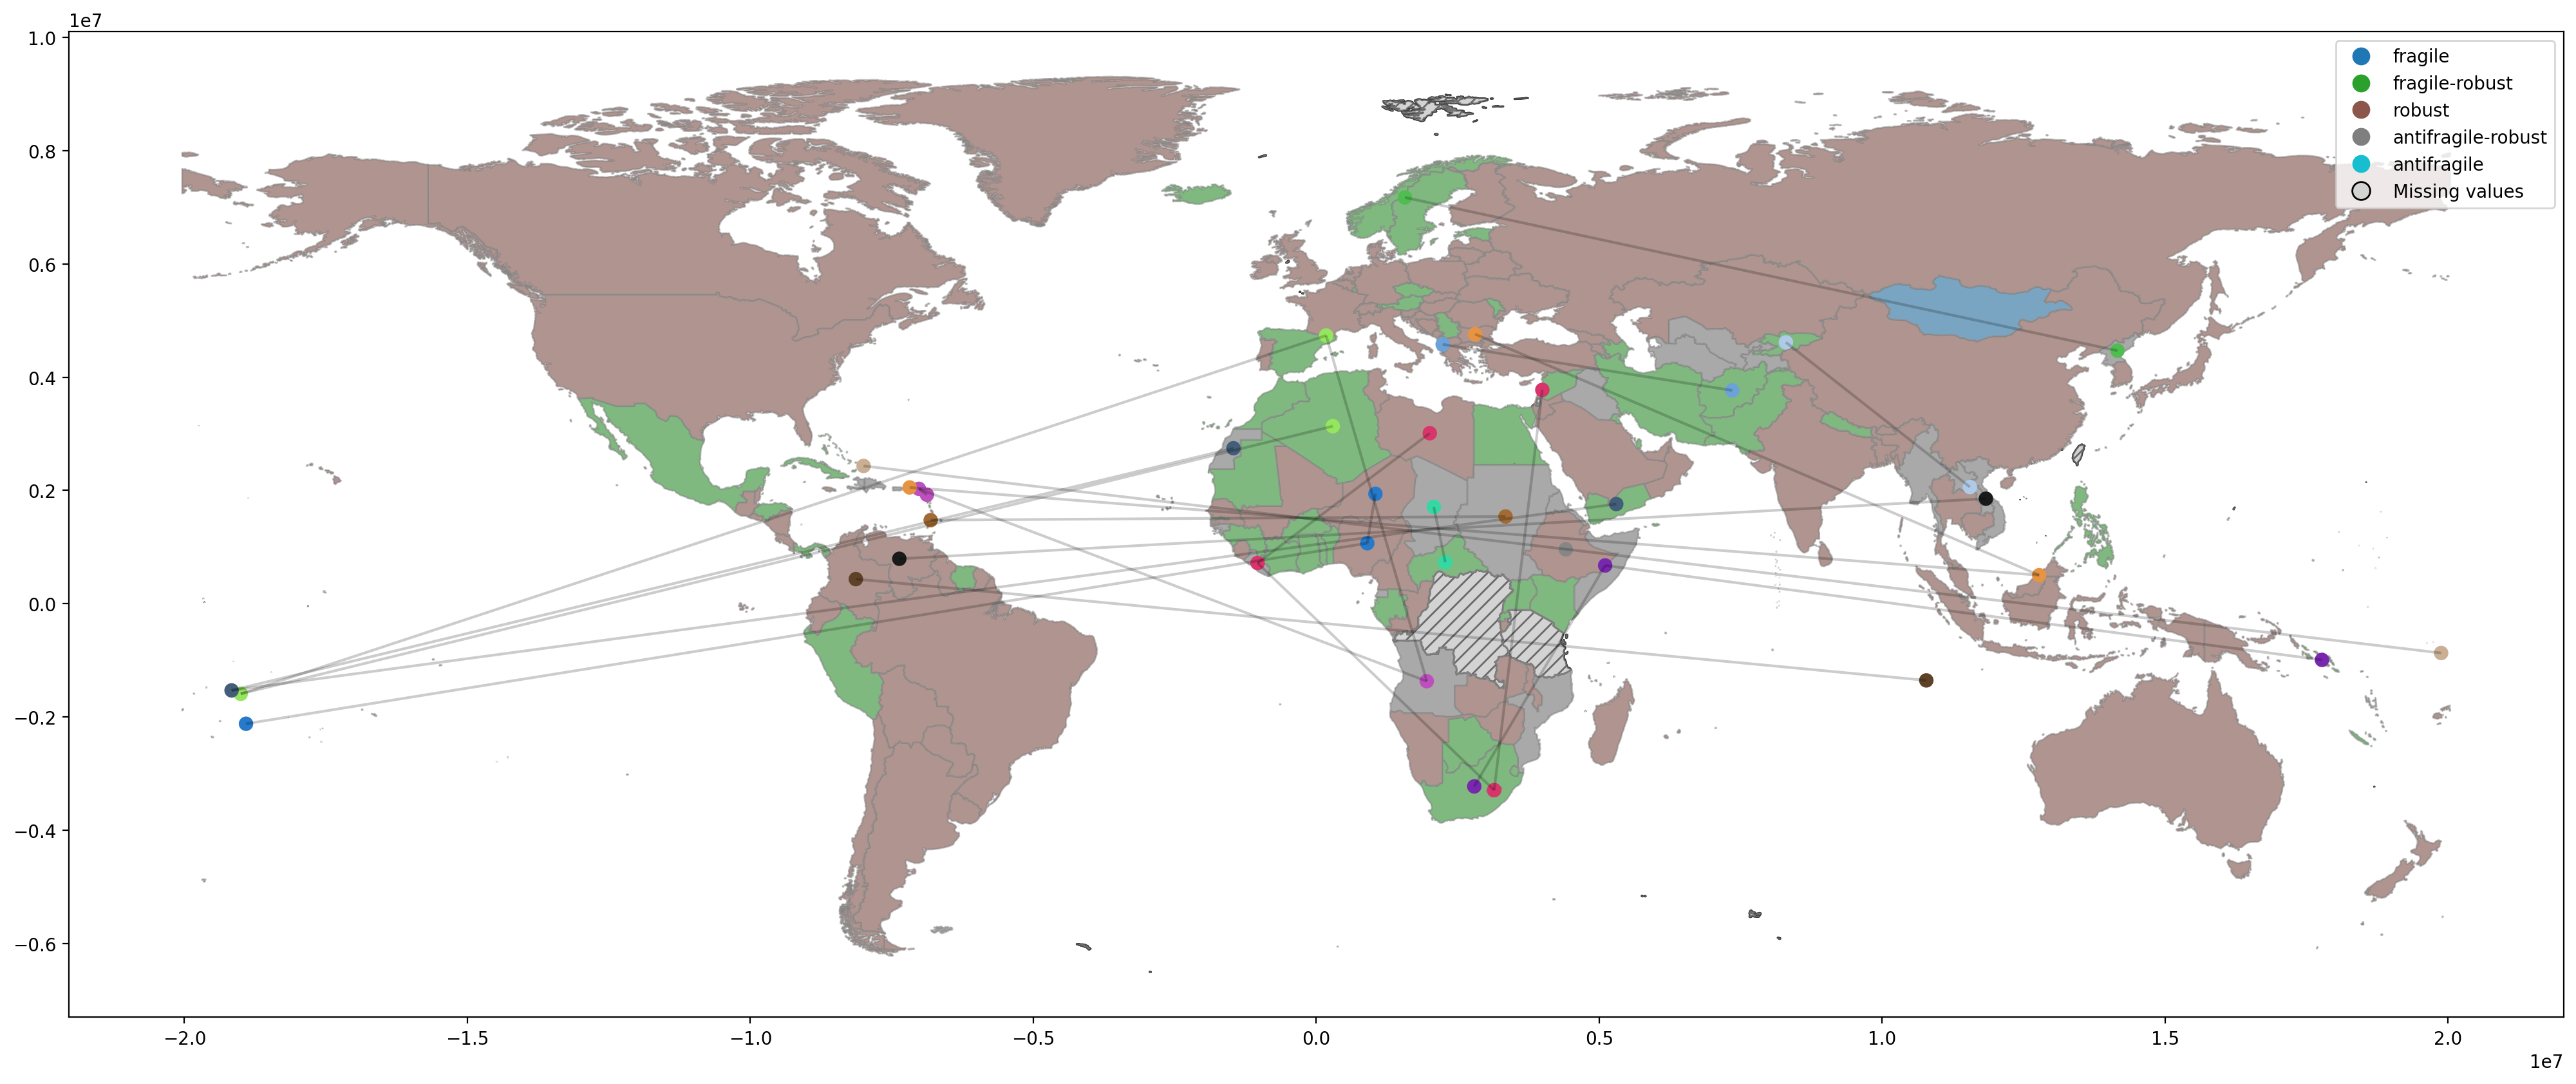

In [390]:
explore()

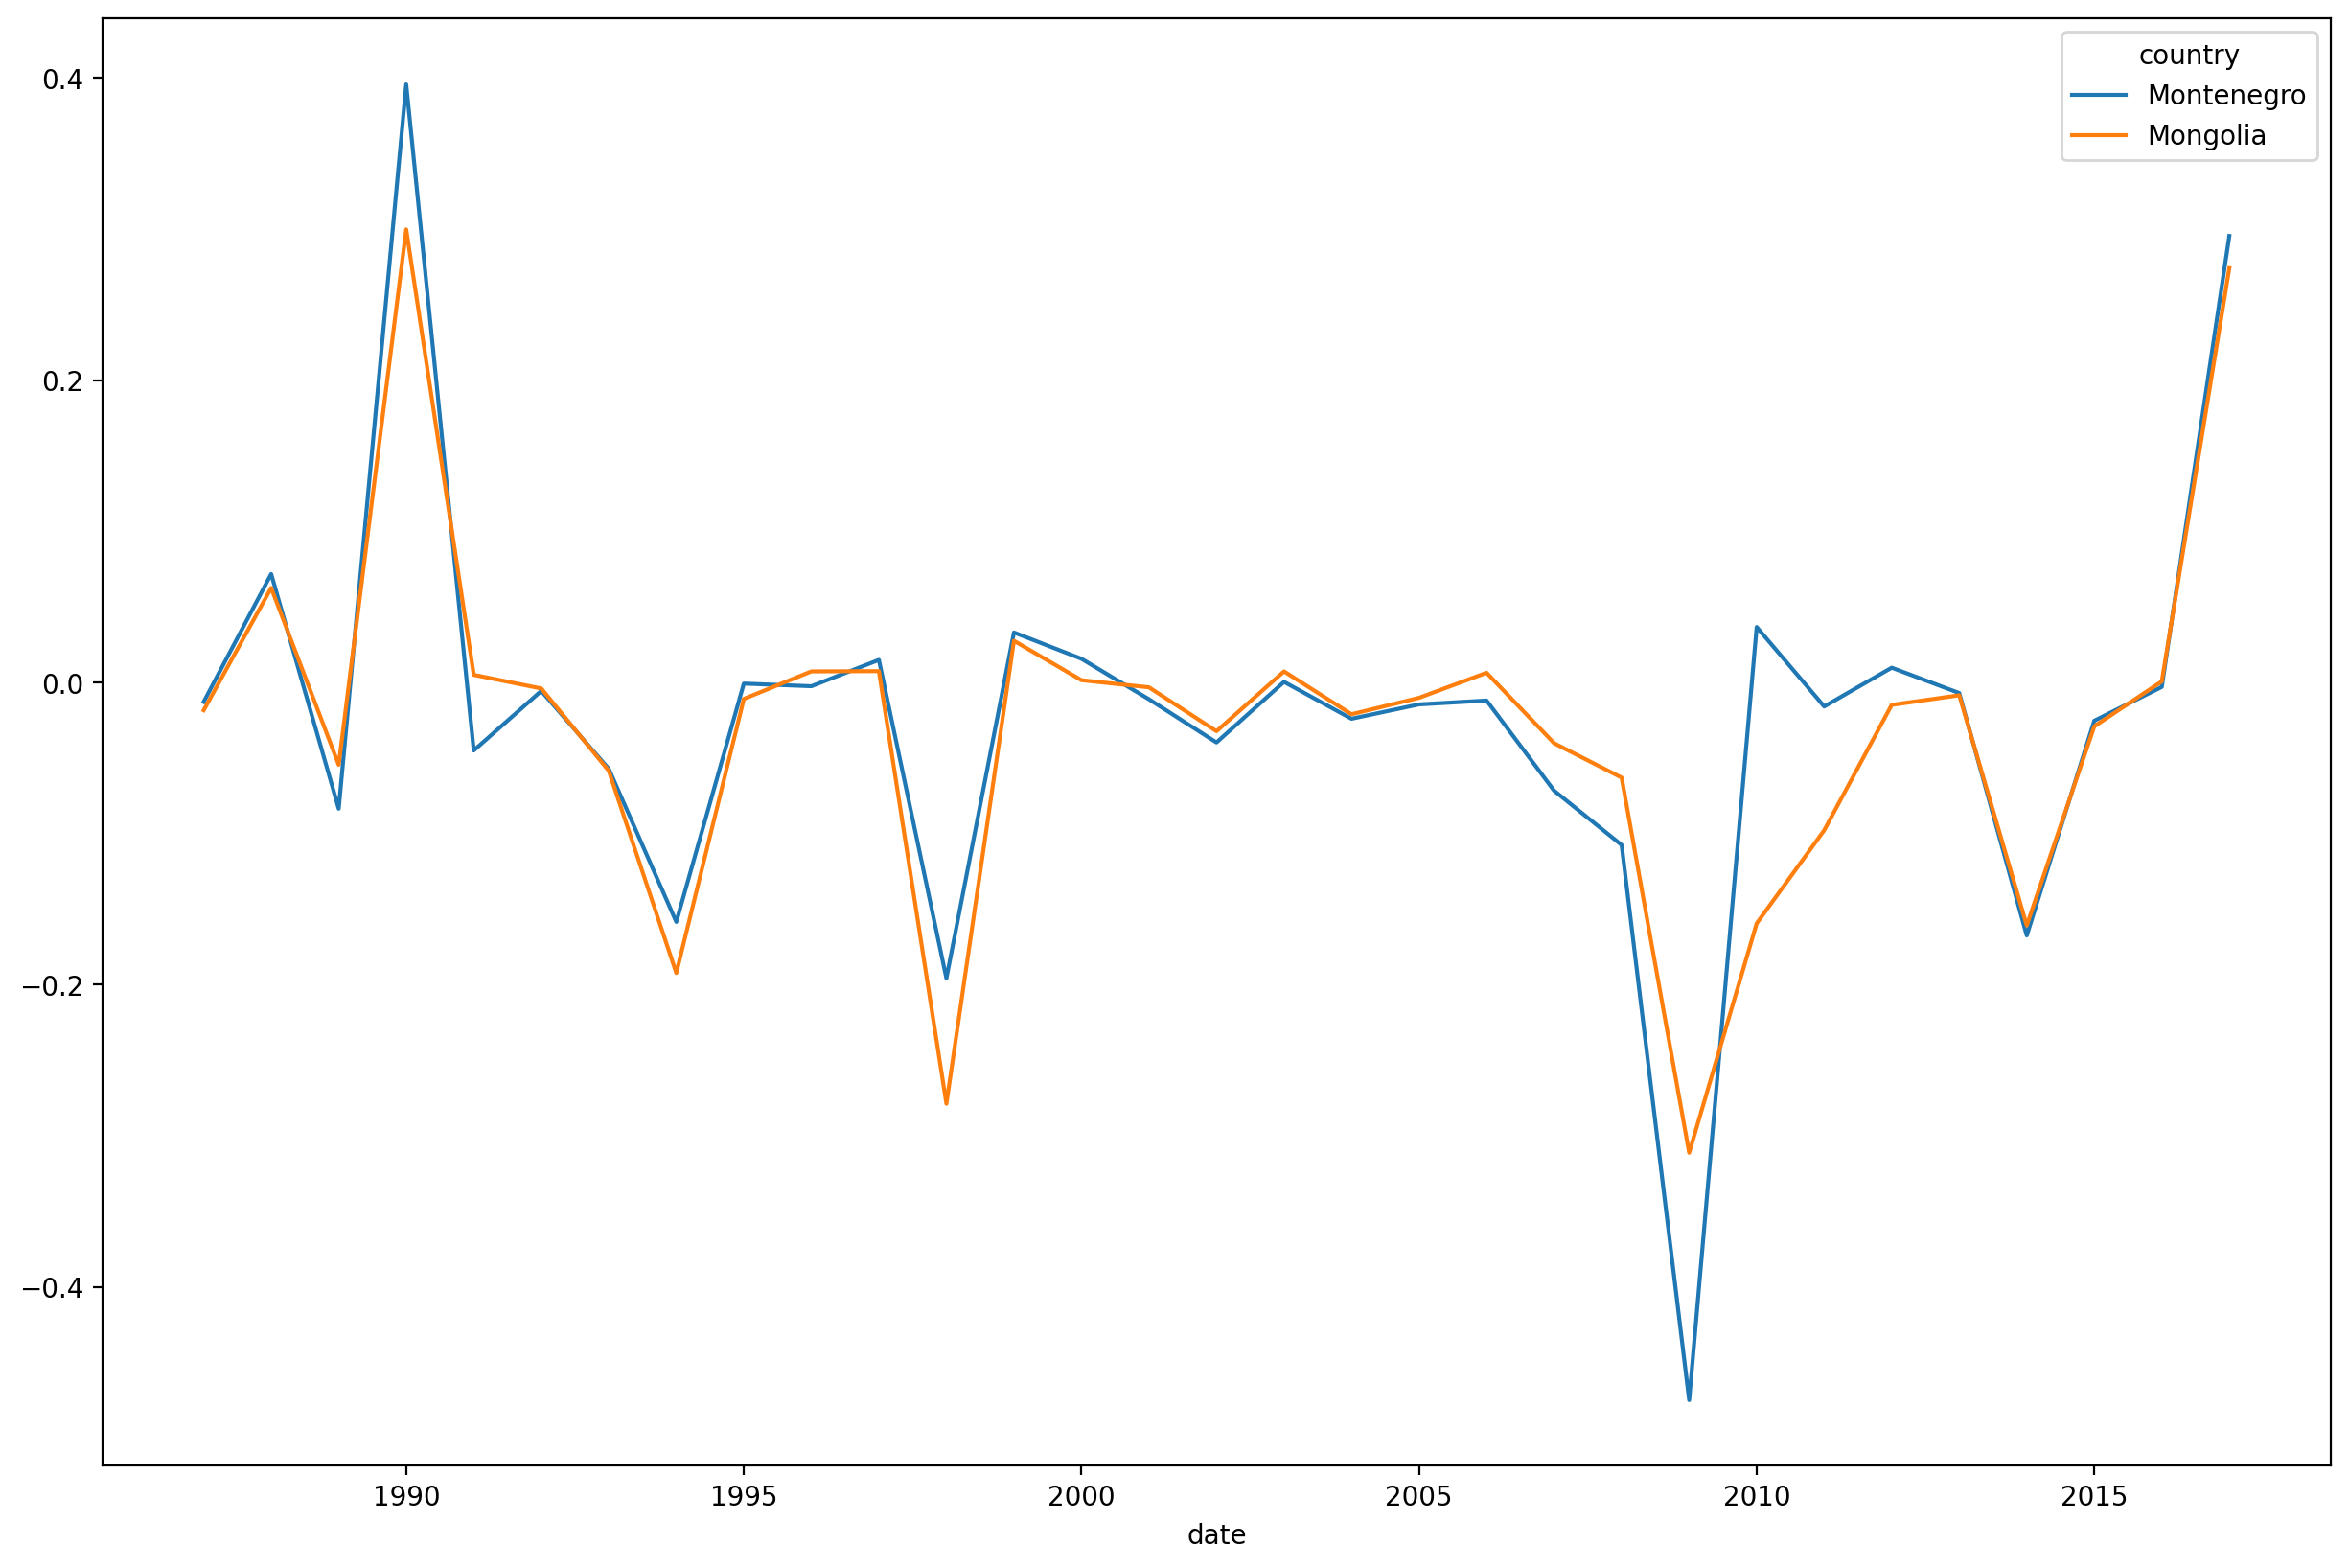

In [386]:
mean_af_piv.T[['Montenegro','Mongolia']].plot()
plt.show()